# Problem Statement
The dataset is similar to MNIST, but includes images of certain clothing and accessory. The objective is to classify images into specific classes using single layer perceptron and multilayer perceptron.

Dataset Description

Total Images: 70,000
Train Images: 60,000
Test Images: 10,000
Image Size: 28 X 28
Classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
Tasks to be Performed: As a part of this assignment you will be performing the following tasks:

Prepare a detailed python notebook(similar to this one) using muli-layer perceptron for classifing the images from 
MNIST Fashion Dataset with best accuracy
Prepare the dataset for the model
Develop Single Layer Perceptron model for classifying the handwritten digits
Plot the change in accuracy per epochs
Evaluate the model on the testing data
Analyse the model summary
Add hidden layer to the model to make it Multi-Layer Perceptron
Add Dropout to prevent overfitting and check its effect on accuracy
Increasing the number of Hidden Layer neuron and check its effect on accuracy
Use different optimizers and check its effect on accuracy
Increase the hidden layers and check its effect on accuracy
Manipulate the batch_size and epochs and check its effect on accuracy
Answer: What parameters should be choosen to get best accuracy on classifying the images into various categories?

In [9]:
# Loading MNIST dataset
import tensorflow as tf
from tensorflow import keras 
mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [10]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
###Data Preprocessing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


In [13]:
# Designing the Model
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
training = model_0.fit(X_train, Y_train, batch_size=128, epochs=70, validation_split=0.2) 

Epoch 1/70
375/375 [==============================] - 1s 2ms/step - loss: 1.2464 - accuracy: 0.6226 - val_loss: 0.9064 - val_accuracy: 0.7163
Epoch 2/70
375/375 [==============================] - 1s 2ms/step - loss: 0.8323 - accuracy: 0.7356 - val_loss: 0.7631 - val_accuracy: 0.7581
Epoch 3/70
375/375 [==============================] - 1s 2ms/step - loss: 0.7347 - accuracy: 0.7683 - val_loss: 0.6992 - val_accuracy: 0.7754
Epoch 4/70
375/375 [==============================] - 1s 2ms/step - loss: 0.6824 - accuracy: 0.7832 - val_loss: 0.6585 - val_accuracy: 0.7899
Epoch 5/70
375/375 [==============================] - 1s 2ms/step - loss: 0.6478 - accuracy: 0.7930 - val_loss: 0.6299 - val_accuracy: 0.7980
Epoch 6/70
375/375 [==============================] - 1s 2ms/step - loss: 0.6227 - accuracy: 0.8002 - val_loss: 0.6091 - val_accuracy: 0.8030
Epoch 7/70
375/375 [==============================] - 1s 2ms/step - loss: 0.6033 - accuracy: 0.8048 - val_loss: 0.5930 - val_accuracy: 0.8077
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


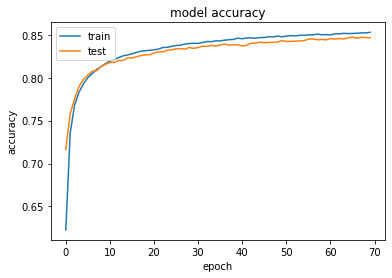

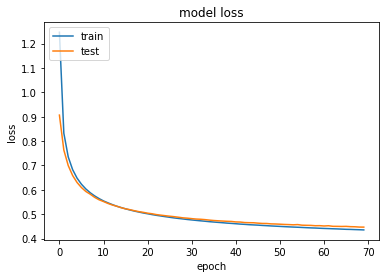

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.8367
Test accuracy: 0.8367000222206116


In [16]:
model_0.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [17]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))
# Compiling the model.
model_1.compile(optimizer='SGD', 
                loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=128, epochs=100, validation_split=0.2) 


Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0501 - accuracy: 0.6593 - val_loss: 0.7004 - val_accuracy: 0.7527
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.6209 - accuracy: 0.7896 - val_loss: 0.5682 - val_accuracy: 0.8039
Epoch 3/100
750/750 [==============================] - 1s 2ms/step - loss: 0.5422 - accuracy: 0.8135 - val_loss: 0.5190 - val_accuracy: 0.8186
Epoch 4/100
750/750 [==============================] - 1s 2ms/step - loss: 0.5042 - accuracy: 0.8251 - val_loss: 0.4951 - val_accuracy: 0.8212
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4802 - accuracy: 0.8334 - val_loss: 0.4842 - val_accuracy: 0.8282
Epoch 6/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4614 - accuracy: 0.8392 - val_loss: 0.4858 - val_accuracy: 0.8243
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4479 - accuracy: 0.8445 - val_loss: 0.4998 - val_accuracy: 0.8234

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


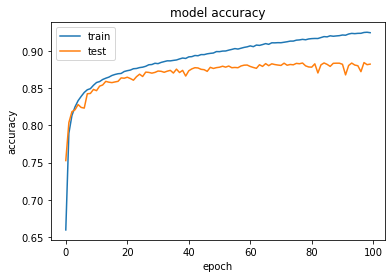

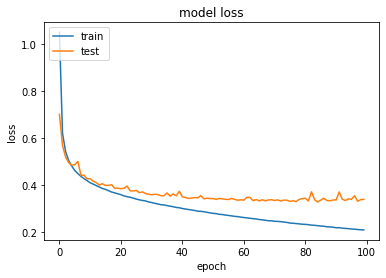

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8744
Test accuracy: 0.8744000196456909


In [20]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 2s 3ms/step - loss: 1.2369 - accuracy: 0.5630 - val_loss: 0.7326 - val_accuracy: 0.7467
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.8025 - accuracy: 0.7147 - val_loss: 0.6113 - val_accuracy: 0.7897
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6877 - accuracy: 0.7597 - val_loss: 0.5515 - val_accuracy: 0.8050
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6277 - accuracy: 0.7807 - val_loss: 0.5086 - val_accuracy: 0.8213
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5846 - accuracy: 0.7948 - val_loss: 0.4843 - val_accuracy: 0.8302
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5545 - accuracy: 0.8093 - val_loss: 0.4651 - val_accuracy: 0.8314
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5304 - accuracy: 0.8124 - val_loss: 0.4537 - val_accuracy: 0.8373
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


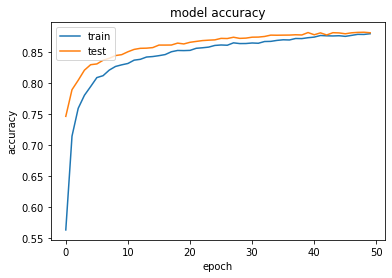

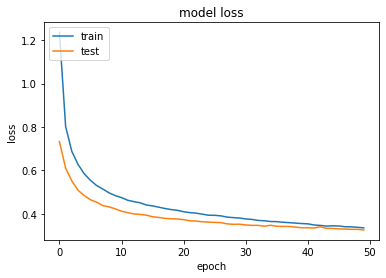

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8747
Test accuracy: 0.8747000098228455


In [23]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.06004223, -0.03044289,  0.01338549, ...,  0.00198194,
         -0.05750878,  0.03409571],
        [ 0.02173739, -0.05505218,  0.02003456, ...,  0.06916206,
         -0.05797506, -0.01114268],
        [-0.0611184 , -0.04199495,  0.05974367, ..., -0.00765201,
          0.02951987, -0.02748773],
        ...,
        [ 0.07928587, -0.02491694, -0.00614196, ..., -0.07233789,
         -0.03492483, -0.00266634],
        [-0.06148218,  0.01988742, -0.07518522, ..., -0.07031537,
         -0.00498648, -0.07993809],
        [-0.02223307, -0.06545065,  0.00374689, ...,  0.04603064,
          0.05896486, -0.01792989]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 0.31847328,  0.17086127, -0.02783381,  0.15260279,  0.19932547,
         0.02264694,  0.12511705,  0.08441454,  0.1502981 ,  0.26397267,
         0.125923  , -0.01116739, -0.1993875 , -0.03304085,  0.00

In [27]:
###Improved Model 3: Changing the Optimizer - Adam
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 256
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))
# Compiling the model.
model_3.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.2) 


Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.6192 - accuracy: 0.7791 - val_loss: 0.4340 - val_accuracy: 0.8405
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4335 - accuracy: 0.8428 - val_loss: 0.3759 - val_accuracy: 0.8629
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3948 - accuracy: 0.8571 - val_loss: 0.3662 - val_accuracy: 0.8654
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3697 - accuracy: 0.8650 - val_loss: 0.3418 - val_accuracy: 0.8759
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3531 - accuracy: 0.8719 - val_loss: 0.3486 - val_accuracy: 0.8727
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3417 - accuracy: 0.8742 - val_loss: 0.3359 - val_accuracy: 0.8773
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3336 - accuracy: 0.8763 - val_loss: 0.3316 - val_accuracy: 0.8761
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


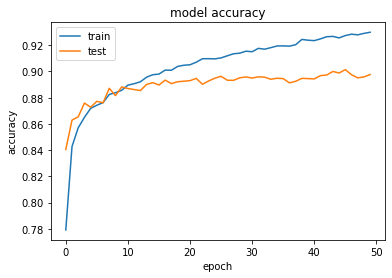

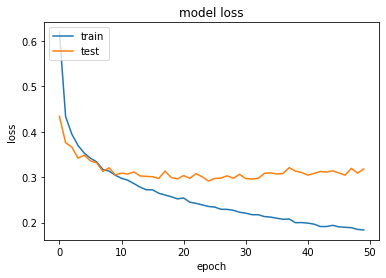

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8945
Test accuracy: 0.8945000171661377


In [30]:
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))
# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.2) 

Epoch 1/50
375/375 [==============================] - 4s 11ms/step - loss: 0.5659 - accuracy: 0.7966 - val_loss: 0.4049 - val_accuracy: 0.8551
Epoch 2/50
375/375 [==============================] - 4s 10ms/step - loss: 0.4109 - accuracy: 0.8518 - val_loss: 0.3613 - val_accuracy: 0.8677
Epoch 3/50
375/375 [==============================] - 4s 10ms/step - loss: 0.3763 - accuracy: 0.8618 - val_loss: 0.3472 - val_accuracy: 0.8713
Epoch 4/50
375/375 [==============================] - 4s 10ms/step - loss: 0.3554 - accuracy: 0.8703 - val_loss: 0.3397 - val_accuracy: 0.8767
Epoch 5/50
375/375 [==============================] - 4s 10ms/step - loss: 0.3370 - accuracy: 0.8753 - val_loss: 0.3257 - val_accuracy: 0.8821
Epoch 6/50
375/375 [==============================] - 4s 10ms/step - loss: 0.3223 - accuracy: 0.8809 - val_loss: 0.3259 - val_accuracy: 0.8802
Epoch 7/50
375/375 [==============================] - 4s 10ms/step - loss: 0.3148 - accuracy: 0.8819 - val_loss: 0.3279 - val_accuracy: 0.8751

In [31]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.8901
Test accuracy: 0.8901000022888184


In [32]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))
# Compiling the model.
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 


Epoch 1/50
750/750 [==============================] - 8s 10ms/step - loss: 0.5487 - accuracy: 0.8018 - val_loss: 0.3834 - val_accuracy: 0.8597
Epoch 2/50
750/750 [==============================] - 8s 10ms/step - loss: 0.4145 - accuracy: 0.8488 - val_loss: 0.3628 - val_accuracy: 0.8692
Epoch 3/50
750/750 [==============================] - 7s 10ms/step - loss: 0.3835 - accuracy: 0.8588 - val_loss: 0.3596 - val_accuracy: 0.8683
Epoch 4/50
750/750 [==============================] - 8s 10ms/step - loss: 0.3578 - accuracy: 0.8664 - val_loss: 0.3364 - val_accuracy: 0.8791
Epoch 5/50
750/750 [==============================] - 8s 10ms/step - loss: 0.3458 - accuracy: 0.8717 - val_loss: 0.3324 - val_accuracy: 0.8788
Epoch 6/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3327 - accuracy: 0.8762 - val_loss: 0.3411 - val_accuracy: 0.8760
Epoch 7/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3229 - accuracy: 0.8803 - val_loss: 0.3343 - val_accuracy: 0.8773
E

In [33]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3608 - accuracy: 0.8883
Test accuracy: 0.8883000016212463


In [43]:
# Adding Extra Hidden Layer
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
training = model_6.fit(X_train, Y_train, batch_size=256, epochs=50, validation_split=0.2) 

Epoch 1/50
188/188 [==============================] - 5s 25ms/step - loss: 0.6234 - accuracy: 0.7743 - val_loss: 0.4238 - val_accuracy: 0.8484
Epoch 2/50
188/188 [==============================] - 5s 25ms/step - loss: 0.4259 - accuracy: 0.8442 - val_loss: 0.3729 - val_accuracy: 0.8614
Epoch 3/50
188/188 [==============================] - 5s 25ms/step - loss: 0.3807 - accuracy: 0.8606 - val_loss: 0.3600 - val_accuracy: 0.8724
Epoch 4/50
188/188 [==============================] - 5s 25ms/step - loss: 0.3611 - accuracy: 0.8683 - val_loss: 0.3463 - val_accuracy: 0.8710
Epoch 5/50
188/188 [==============================] - 5s 25ms/step - loss: 0.3462 - accuracy: 0.8733 - val_loss: 0.3322 - val_accuracy: 0.8814
Epoch 6/50
188/188 [==============================] - 5s 26ms/step - loss: 0.3301 - accuracy: 0.8781 - val_loss: 0.3325 - val_accuracy: 0.8788
Epoch 7/50
188/188 [==============================] - 5s 25ms/step - loss: 0.3191 - accuracy: 0.8811 - val_loss: 0.3201 - val_accuracy: 0.8830

In [44]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3446 - accuracy: 0.8944
Test accuracy: 0.8944000005722046


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


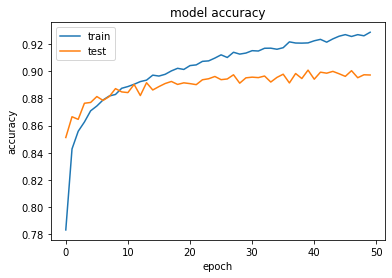

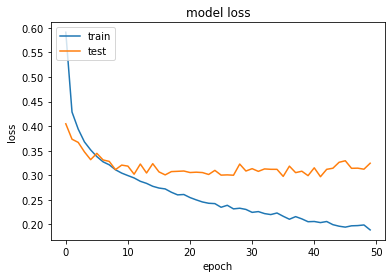

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# Adding Extra Hidden Layer with RMSprop optimizer
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_7 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_7.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_7.add(Dropout(0.3))

# Adding another dense layer:
model_7.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_7.add(Dropout(0.3))

# Adding another dense layer:
model_7.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_7.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_7.add(Dense(10, name='dense_layer_4', activation = 'softmax'))
model_7.compile(optimizer='RMSprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
training = model_7.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 14s 18ms/step - loss: 0.6212 - accuracy: 0.7750 - val_loss: 0.4290 - val_accuracy: 0.8492
Epoch 2/50
750/750 [==============================] - 14s 19ms/step - loss: 0.4884 - accuracy: 0.8299 - val_loss: 0.4241 - val_accuracy: 0.8547
Epoch 3/50
750/750 [==============================] - 15s 20ms/step - loss: 0.4757 - accuracy: 0.8391 - val_loss: 0.4199 - val_accuracy: 0.8625
Epoch 4/50
750/750 [==============================] - 15s 20ms/step - loss: 0.4710 - accuracy: 0.8434 - val_loss: 0.4438 - val_accuracy: 0.8571
Epoch 5/50
750/750 [==============================] - 15s 20ms/step - loss: 0.4782 - accuracy: 0.8470 - val_loss: 0.4283 - val_accuracy: 0.8630
Epoch 6/50
750/750 [==============================] - 15s 20ms/step - loss: 0.4818 - accuracy: 0.8496 - val_loss: 0.4621 - val_accuracy: 0.8479
Epoch 7/50
750/750 [==============================] - 15s 20ms/step - loss: 0.4799 - accuracy: 0.8488 - val_loss: 0.4181 - val_accuracy:

In [41]:
test_loss, test_acc = model_7.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8716 - accuracy: 0.8614
Test accuracy: 0.8614000082015991


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


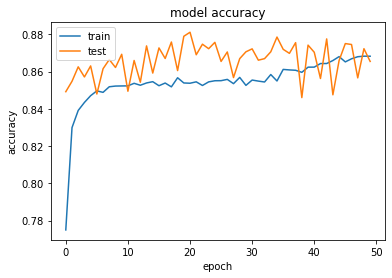

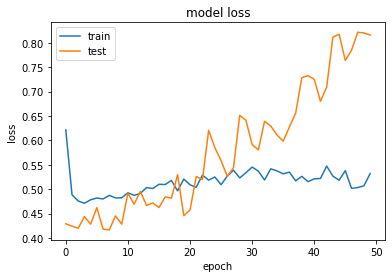

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Answer: What parameters should be choosen to get best accuracy on classifying the images into various categories?

The parameters for which the Accuracy is best is with 
Hidden layers=512,Dropout=0.3,batch_size=64, epochs=50, validation_split=0.2,Optimizer=Adam where Accuracy=0.894 i.e 89.4%